# Week 7 


Henriette Steenhoff, s134869

## Reading NLP - Processing raw text - chapter 3

*Tokenizing and stemming*

All text in the Gutenberg Project [here](http://www.gutenberg.org/catalog/)

### Raw text manipulation

In [ ]:
# Accessing text from web and disk
# URL
import nltk
from urllib import urlopen
url = "http://www.gutenberg.org/files/2554/2554.txt"
raw = urlopen(url).read()
print type(raw), "\nnumer of words:", len(raw), "\nname:", raw[:75]

In [ ]:
# Tokenizing the text
tokens = nltk.word_tokenize(raw)
print type(tokens), "\nnumber of words:", len(tokens)


In [ ]:
# Slicing
text = nltk.Text(tokens)
text[1020:1060]
text.collocations()

In [ ]:
# Removing everything before start of text and after end of text
print "start of text:", raw.find("PART I"), "\nend of text:", raw.rfind("End of Project") # reverse find, starting from end

In [ ]:
# keeping only the text
raw = raw[5338:1157746]

### Dealing with HTML

In [ ]:
# Fetching data fom an html document
from bs4 import BeautifulSoup as bs 

url = "http://danskebak.dk"
html = urlopen(url).read()
raw = bs(html,"html")
#html[:60] # yep! it's an html formatted document
text = raw.get_text()
print text

In [ ]:
# Tokenizing
tokens = nltk.word_tokenize(text)
tokens
# This still contains a lot of unwanted material and some logic!

### Search engines

Search engines have some significant shortcomings. First, the allowable
range of search patterns is severely restricted. Unlike local corpora, where you write
programs to search for arbitrarily complex patterns, search engines generally only allow
you to search for individual words or strings of words, sometimes with wildcards. Second,
search engines give inconsistent results, and can give widely different figures when
used at different times or in different geographical regions. When content has been
duplicated across multiple sites, search results may be boosted. Finally, the markup in
the result returned by a search engine may change unpredictably, breaking any patternbased
method of locating particular content (a problem which is ameliorated by the
use of search engine APIs).

In [ ]:
# Universal feed parser
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
print llog['feed']['title'], len(llog.entries)

In [ ]:
post = llog.entries[2]
content = post.content[0].value
content[0:140]

In [ ]:
# Getting the text part you actually want!
clean_content = bs(content,"html")
text_content = nltk.wordpunct_tokenize(clean_content.get_text())
text = nltk.Text(text_content)
print text # Getting the text written nicely
print text[0:50] # Getting everything as tokens

### Reading local files

In [ ]:
f = open('thetaleofthethreebrothers.txt')
raw = f.read()
raw

In [ ]:
tokens = nltk.wordpunct_tokenize(raw)
text = nltk.Text(tokens)
print text[0:60]

In [ ]:
# Normalize (to lower)
words = [w.lower() for w in text]
vocab = sorted(set(words))
print '%s' % vocab

### Text processing at the lowest level

In [ ]:
# Basic Python stuff

### What is Unicode?
Python codecs documentation [here](https://docs.python.org/2/c-api/unicode.html)

The book on pages 95-97

In [ ]:
#import codecs
#f = codecs.open('thetaleofthethreebrothers.txt', encoding='ascii')

#line.encode('unicode_escape')

### Regular expressions and metacharacthers

In [ ]:
import re

# Searching for words with -ed ending 
new = [w for w in vocab if re.search('ed$',w)]
new

In [ ]:
# wildcard character
pattern = [w for w in vocab if re.search('^...st..$', w)]
pattern

In [ ]:
pattern2 = [w for w in vocab if re.search('^..j?..t..$',w)]
pattern2

In [ ]:
# Kleene closures
# * zero or more
# + one or more

# ^ sequence at the beginning of a word
# $ sequence at the end of a word

![Behaviour of operators for regular expressions.](re.PNG)

### Finding word stems

In [ ]:
# Getting only  suffix
re.findall(r'^.*(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

# Getting only prefix (all about parenthesizing)
re.findall(r'^.*(?:ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

# Splitting into pre and suffix
re.findall(r'^(.*)(ing|ly|ed|ious|ies|ive|es|s|ment)$', 'processing')

# There are still thins that needs to be fixed to get the stem. Otherwise we could get 'processe' 's'

In [ ]:
# Better soultion (still creating some nonwords)
def stem(word):
    regexp = r'^(.*?)(ing|y|ed|ious|ies|ive|es|s|ment)?$'
    stem, suffix = re.findall(regexp,word)[0]
    return stem

In [ ]:
[stem(t) for t in vocab]

### Searching tokenized text

In [ ]:
from nltk.corpus import gutenberg, nps_chat

# Words in the context a <something> man
moby = nltk.Text(gutenberg.words('melville-moby_dick.txt'))
moby.findall(r"<a> (<.*>) <man>")

# Any two words followed by bro
chat = nltk.Text(nps_chat.words())
chat.findall(r"<.*> <.*> <bro>")

# Sequences of thre or more words starting with lo
chat.findall(r"<lo.*>{3,}")

# Some for fun
chat.findall(r'<.*><was><like><.*>')
chat.findall(r'<I><love><.*>')

### Normalizing text

In [ ]:
porter = nltk.PorterStemmer()
[porter.stem(t) for t in chat]

In [ ]:
class IndexedText(object):

    def __init__(self, stemmer, text):
        self._text = text
        self._stemmer = stemmer
        self._index = nltk.Index((self._stem(word), i)
                                for (i, word) in enumerate(text))

    def concordance(self, word, width=40):
        key = self._stem(word)
        wc = width/4 # words of context
        for i in self._index[key]:
            lcontext = ' '.join(self._text[i-wc:i])
            rcontext = ' '.join(self._text[i:i+wc])
            ldisplay = '%*s' % (width, lcontext[-width:])
            rdisplay = '%-*s' % (width, rcontext[:width])
            print ldisplay, rdisplay

    def _stem(self, word):
        return self._stemmer.stem(word).lower()

In [ ]:
# Concordance on stemmed text - can find the meaning.
porter = nltk.PorterStemmer()
grail = nltk.corpus.webtext.words('grail.txt')
text = IndexedText(porter, grail)

In [ ]:
# Concordance in stemmed text with proter stemmer
text.concordance('walk')

## Words that characterize branches

TF-IDF, from [wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
> tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

TF: term frequency

IDF: inverse document frequency

**Setup**
* Since we want to find out which words are important for each branch, so we're going to create six large documents, one per branch of philosophy. Tokenize the pages, and combine the tokens into one long list per branch. Remember the bullets below for success.
  * If you dont' know what tokenization means, go back and read Chapter 3 again. This advice is valid for every cleaning step below.
  * Exclude philosopher names (since we're interested in the words, not the names).
  * Exclude punctuation.
  * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
  * Exclude numbers (since they're difficult to interpret in the word cloud).
  * Set everything to lower case.
* Note that none of the above has to be perfect. It might not be easy to remove all philosopher names. And there's some room for improvisation. You can try using stemming. In my own first run the results didn't look so nice, because some pages are very detailed and repeat certain words again and again and again, whereas other pages are very short. For that reason, I decided to use the unique set of words from each page rather than each word in proportion to how it's actually used on that page. Choices like that are up to you.

In [6]:
import re
import urllib2 
# Getting all as plain text with: prop=extraxt&exlimit=max&plaintext
# Getting the philosopher informatiom
baseurl    = "https://en.wikipedia.org/w/api.php?"
action     = "action=query"
title      = "titles="
content    = "prop=revisions&rvprop=content" #"prop=extracts&exlimit=max&plaintext&rvprop=content"
dataformat = "format=json"


# List of all Philosophers by core area
list_phil = ['List_of_aestheticians','List_of_epistemologists','List_of_ethicists','List_of_logicians','List_of_metaphysicians','List_of_social_and_political_philosophers']
query = []     # current query to process
phil_count = 0 # accumulated count of philosophers in each group
all_phil = {}  # final list of all philosophers
ii = 1

# constructing query for getting all Philosopher data
for core_area in list_phil:
    query = "%s%s&%s&%s&%s&utf8=" % (baseurl,action,title+core_area,content,dataformat)

    f = urllib2.urlopen(query)
    area_links = re.findall(r'\*.?\[\[([^\]|]+)\|?[^\]]*\]\]',f.read())
    trim_area_links = [item for item in area_links if not item.lower().startswith('list of')]
    for nb in trim_area_links:
        all_phil[nb] = ii
    print "Query for:", core_area
    print (query)
    print "Number of philosophers: ", len(trim_area_links)
    print trim_area_links
    #print trim_area_links
    
    # Accumulate number of philosophers
    phil_count = phil_count + len(trim_area_links)
    ii = ii+1

#all_phil
print "Philosophers in all: ", phil_count

Query for: List_of_aestheticians
https://en.wikipedia.org/w/api.php?action=query&titles=List_of_aestheticians&prop=revisions&rvprop=content&format=json&utf8=
Number of philosophers:  124
['Andreas Linder', 'Virgil Aldrich', 'Anandavardhana', 'Sri Aurobindo', 'John Anderson (philosopher)', 'Yves Marie Andr\xc3\xa9', 'Aristotle', 'Rudolf Arnheim', 'Mazen Asfour', 'Georg Anton Friedrich Ast', 'Jody Azzouni', 'Victor Basch', 'Yusuf Balasagun', 'Roland Barthes', 'Georges Bataille', 'Alexander Gottlieb Baumgarten', 'Monroe Beardsley', 'Vissarion Belinsky', 'Clive Bell', 'Walter Benjamin', 'Arnold Berleant', 'George Birkhoff', 'Max Black', 'Maurice Blanchot', 'Harold Bloom', 'Georg Brandes', 'Cameron Breen', 'Jean Anthelme Brillat-Savarin', 'Ferruccio Busoni', 'John Cage', 'Cesare Brandi', 'Stanley Cavell', 'R. G. Collingwood', 'Victor Cousin', 'Benedetto Croce', 'Gregory Currie', 'Arthur Danto', 'William C. Dowling', 'John Dewey', 'Umberto Eco', 'Jonathan Edwards (theologian)', 'Ralph Waldo 

In [7]:
#all_phil['Aristotle']

In [8]:
import urllib
# Extract content from all lists
content = "prop=extracts&exlimit=max&explaintext"
all_text = []
aest =  []
logic = []
soc =   []
epi =   []
eth =   []
meta =  []

In [9]:
i = 1

for phil in all_phil:
    baseurl    = "https://en.wikipedia.org/w/api.php?" # ensure English wiki
    if(phil.startswith(":")):
        # Redirect to right page if no English available
        cc      = re.search(r'^:([a-zA-Z]+):',phil).group(1)
        phil    = re.sub(r'^:([a-zA-Z]+):','',phil)
        baseurl = "https://%s.wikipedia.org/w/api.php?" % (cc)
    
    # Create query
    phil_q = urllib.quote(phil.replace(" ","_"))
    #print phil_q
    query = "%s%s&%s&%s&%s&utf8=" % (baseurl,action,title+phil_q,content,dataformat)
    #print query
    f = urllib2.urlopen(query)
    
    if phil == 'Martinus Dorpius' or all_phil[phil] == 1:
        aest.append(f.read())
    elif all_phil[phil] == 2:
        logic.append(f.read())
    elif all_phil[phil] == 3:
        soc.append(f.read())
    elif all_phil[phil] == 4:
        epi.append(f.read())
    elif all_phil[phil] == 5:
        eth.append(f.read())
    else:
        meta.append(f.read())
    i = i+1
    
   

In [10]:
# Remove all things noon-alphanumeric
def stripNonAlphaNum(text):
    import re
    return re.compile(r'[\W+]|[^\D]', re.UNICODE).split(text)

In [11]:
from nltk.corpus import stopwords

##############################################
# Prepare for some code duplication ....     #
##############################################

# SOCIAL AND POLITICAL
# Tokenizing
str_soc    = ''.join(soc)
decode_soc = str_soc.decode('utf8')
text_soc   = stripNonAlphaNum(decode_soc)  # removes all non-characther and numbers
# Remove English stopwords and empty entries
stoplist = stopwords.words('english')
soc_tokens   = [token.lower() for token in text_soc if token.strip().lower() not in stoplist and token != '' and len(token) > 1] 

soc_tokens = soc_tokens[24:]
#soc_tokens

In [12]:
# take a look at stopwords
stoplist

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [13]:
from nltk.corpus import stopwords

# AESTHETICIANS
#Tokenizing
str_aest    = ''.join(aest)
decode_aest = str_aest.decode('utf8')
text_aest   = stripNonAlphaNum(decode_aest)  # removes all non-characther and numbers
# Remove English stopwords and empty entries
stoplist = stopwords.words('english')
aest_tokens   = [token.lower() for token in text_aest if token.strip().lower() not in stoplist and token != '' and len(token) > 1] 

aest_tokens = aest_tokens[19:]
#aest_tokens

In [14]:
# Ethnicists
#Tokenizing
str_eth    = ''.join(eth)
decode_eth = str_eth.decode('utf8')
text_eth   = stripNonAlphaNum(decode_eth)  # removes all non-characther and numbers
# Remove English stopwords and empty entries
stoplist = stopwords.words('english')
eth_tokens   = [token.lower() for token in text_eth if token.strip().lower() not in stoplist and token != '' and len(token) > 1] 

eth_tokens = eth_tokens[19:]
#eth_tokens


In [15]:
# Logicians
#Tokenizing
str_logic    = ''.join(logic)
decode_logic = str_logic.decode('utf8')
text_logic   = stripNonAlphaNum(decode_logic)  # removes all non-characther and numbers
# Remove English stopwords and empty entries
stoplist = stopwords.words('english')
logic_tokens   = [token.lower() for token in text_logic if token.strip().lower() not in stoplist and token != '' and len(token) > 1] 

logic_tokens = logic_tokens[19:]
#logic_tokens


In [16]:
# Epistemologistc
#Tokenizing
str_epi    = ''.join(epi)
decode_epi = str_epi.decode('utf8')
text_epi   = stripNonAlphaNum(decode_epi)  # removes all non-characther and numbers
# Remove English stopwords and empty entries
stoplist = stopwords.words('english')
epi_tokens   = [token.lower() for token in text_epi if token.strip().lower() not in stoplist and token != '' and len(token) > 1] 

epi_tokens = epi_tokens[19:]
#epi_tokens



In [17]:
# 
#Tokenizing
str_meta    = ''.join(meta)
decode_meta = str_meta.decode('utf8')
text_meta   = stripNonAlphaNum(decode_meta)  # removes all non-characther and numbers
# Remove English stopwords and empty entries
stoplist = stopwords.words('english')
meta_tokens   = [token.lower() for token in text_meta if token.strip().lower() not in stoplist and token != '' and len(token) > 1] 

meta_tokens = meta_tokens[19:]
#meta_tokens



In [18]:
#all tokens from the different branches 
all_tokens = aest_tokens + soc_tokens + eth_tokens + epi_tokens + meta_tokens + logic_tokens

#### TF_IDF 
In information retrieval, tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in information retrieval and text mining.

More describing text [here](http://www.tfidf.com/).

## Exercises
### Finding the top 5 terms within the branches

In [19]:
# number of terms for each branch
aest_len  = len(aest_tokens)
soc_len   = len(soc_tokens)
eth_len   = len(eth_tokens)
epi_len   = len(epi_tokens)
meta_len  = len(meta_tokens)
logic_len = len(logic_tokens)

In [20]:
# test print for getting right format on float
print "%0.5f" % (790.0/114052.0)

0.00693


### Term frequency for the different brances

#### For all words for use later

In [21]:
# Calculating frequency of each word
from collections import Counter
aest_mc_all  = Counter(aest_tokens).items()
soc_mc_all   = Counter(soc_tokens).items()
eth_mc_all   = Counter(eth_tokens).items()
epi_mc_all   = Counter(epi_tokens).items()
meta_mc_all  = Counter(meta_tokens).items()
logic_mc_all = Counter(logic_tokens).items()

In [22]:
aest_len

114106

In [23]:
# initializing TF-dictionaries
aest_dict  = {}
soc_dict   = {}
eth_dict   = {}
epi_dict   = {}
meta_dict  = {}
logic_dict = {}

for w, v in aest_mc_all:
    aest_dict[w] = float(v)/aest_len

    
for w, v in soc_mc_all:
    soc_dict[w] = float(v)/soc_len


for w, v in eth_mc_all:
    eth_dict[w] = float(v)/eth_len


for w, v in epi_mc_all:
    epi_dict[w] = float(v)/epi_len

    
for w, v in meta_mc_all:
    meta_dict[w] = float(v)/meta_len

    
for w, v in logic_mc_all:
    logic_dict[w] = float(v)/logic_len

  

In [24]:
# Checking the resulting values from the dictionaries
aest_dict['philosophy']

0.005424780467284805

#### For the five most occuring words in each branch

In [27]:
type(aest_mc)

list

In [26]:
# list of 5 most occuring
aest_mc = Counter(aest_tokens).most_common(5)
print "Most common aestheticians"
for w, v in aest_mc:
    print w, "%0.10f" % (float(v)/aest_len)

soc_mc = Counter(soc_tokens).most_common(5)
print "\nMost common social and political sciences"
for w, v in soc_mc:
    print w, "%0.10f" % (float(v)/soc_len)

eth_mc = Counter(eth_tokens).most_common(5)
print "\nMost common ethnicists"                                                                                      
for w, v in eth_mc:
    print w, "%0.10f" % (float(v)/eth_len)

epi_mc = Counter(epi_tokens).most_common(5)
print "\nMost common epistemologists"
for w, v in epi_mc:
    print w, "%0.10f" % (float(v)/epi_len)

meta_mc = Counter(meta_tokens).most_common(5)
print "\nMost common metphysicians"
for w, v in meta_mc:
    print w, "%0.10f" % (float(v)/meta_len)

logic_mc = Counter(logic_tokens).most_common(5)
print "\nMost common logicians"
for w, v in logic_mc:
    print w, "%0.10f" % (float(v)/logic_len)


Most common aestheticians
university 0.0062398121
philosophy 0.0054247805
art 0.0051443395
new 0.0045133472
work 0.0040401031

Most common social and political sciences
university 0.0053028378
philosophy 0.0044297660
one 0.0041506693
also 0.0040469026
life 0.0035602724

Most common ethnicists
philosophy 0.0094841769
university 0.0063665648
one 0.0048250404
press 0.0039263939
also 0.0038365293

Most common epistemologists
logic 0.0104032417
university 0.0075063569
philosophy 0.0055209168
theory 0.0054744737
also 0.0044643375

Most common metphysicians
university 0.0049216033
philosophy 0.0045936366
political 0.0040281042
also 0.0036034294
new 0.0035088236

Most common logicians
philosophy 0.0072606316
university 0.0062233985
also 0.0045602489
theory 0.0045423656
knowledge 0.0038627991


#### Describe similarities and differences between the branches.
* All core areas have philosophy and university in the top 3 of the most common words in their branch. 
* All but aestethicians also include 'also' within the top 5 words
* Logicians distinguishes themselves by having 'logic' as most common word and also containing theory and knowledge
* Epistemologists also talk a lot about theory
* Metaphysicians have 'political' as one of their most common words, which political science do not.

#### Why aren't the TFs not necessarily a good description of the branches?
The most frequent word does not look at how the word is used of the context in which is it used. It is merely stating how often the word is used. Furthermore, when looking at the most frequent word, you have to make sure that all stopswords have been removed otherwise the most frequent word would be words like 'a' or 'the' etc. This is what the inverse document frequency looks to weigh out.

### Inverse document frequency

**IDF**: *Inverse Document Frequency*, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

$$IDF(t) = log_e\frac{doc_{tot}}{doc_{termt}}$$

To complete this exercise I will use the natural logarithm

In [28]:
# Finding all unique words to match on
unique_words = set(all_tokens)
print "Number of unique words:", len(unique_words)

Number of unique words: 82318


#### Calculating the inverse document frequency

In [29]:
import numpy as np
# Run through all documents, check wehether the term is in it, count up.
# Run time: O(n+b*b_l), 
# where n is the set of unique words, 
# b the different branches and 
# b_l the lenght of the text

set_aest  = set(aest_tokens)
set_soc   = set(soc_tokens)
set_eth   = set(eth_tokens)
set_epi   = set(epi_tokens)
set_meta  = set(meta_tokens)
set_logic = set(logic_tokens)

# This was my initial thought, but since we only need to check if the word is
# in the text once, we can look at the different branches as sets.
# This highly improves the running time, as the length og the texts are 
# much decreased.

doc_tot = 6   # number of documents in all
doc_cnt = 0.0   # count of occurences in different documents
idf_dict = {} # dictionary to save values

In [30]:
for word in unique_words:
    if word in set_aest:
        doc_cnt += 1
    if word in set_soc:
        doc_cnt += 1
    if word in set_eth:
        doc_cnt += 1
    if word in set_epi:
        doc_cnt += 1
    if word in set_meta:
        doc_cnt += 1
    if word in set_logic:
        doc_cnt += 1
    
    idf_dict[word] = np.log(doc_tot/doc_cnt)
    doc_cnt = 0

In [31]:
# IDF value
# sorted(idf_dict)

In [32]:
# Taking some examples
print idf_dict['adversity']
print idf_dict['philosophy']

0.69314718056
0.0


Now we see, that one of the most common words have the weight 0 which is what we want to see, since the inverse document frequuency weighs down the frequent terms.

### Calculating the IDF weight

Now we need to combine the TF and the IDF results to get the TF-IDF value as wanted.

In [33]:
aest_dict

{u'writings': 0.0009990710392091564,
 u'nallen': 3.505512418277742e-05,
 u'schlegel': 0.0004381890522847177,
 u'nauthor': 8.763781045694355e-06,
 u'yellow': 1.752756209138871e-05,
 u'four': 0.0005521182058787444,
 u'tegn\xe9r': 8.763781045694355e-06,
 u'prefix': 8.763781045694355e-06,
 u'woods': 3.505512418277742e-05,
 u'spiders': 2.6291343137083065e-05,
 u'picardy': 8.763781045694355e-06,
 u'hanging': 2.6291343137083065e-05,
 u'francesca': 8.763781045694355e-06,
 u'cuddihy': 8.763781045694355e-06,
 u'vanarsdel': 8.763781045694355e-06,
 u'aggression': 8.763781045694355e-06,
 u'increase': 4.381890522847177e-05,
 u'rines': 8.763781045694355e-06,
 u'augustine': 6.134646731986048e-05,
 u'eligible': 8.763781045694355e-06,
 u'sprague': 8.763781045694355e-06,
 u'diff\xe9rance': 8.763781045694355e-06,
 u'originality': 3.505512418277742e-05,
 u'superficially': 8.763781045694355e-06,
 u'caned': 2.6291343137083065e-05,
 u'nclark': 8.763781045694355e-06,
 u'hermann': 8.763781045694354e-05,
 u'lord

In [34]:
#import math to get log
import numpy as np

# For every word in each branch, multiply TF by IDF
for w in aest_dict:
    aest_dict[w] = aest_dict[w]*idf_dict[w]

In [35]:
# Weight of frequent word
print aest_dict['philosophy']


0.0


In [36]:
# For every word in each branch, multiply TF by IDF
for w in soc_dict:
    soc_dict[w] = soc_dict[w]*idf_dict[w]

In [37]:
soc_dict['philosophy']

0.0

In [38]:
# For every word in each branch, multiply TF by IDF
for w in eth_dict:
    eth_dict[w] = eth_dict[w]*idf_dict[w]

In [39]:
# For every word in each branch, multiply TF by IDF
for w in epi_dict:
    epi_dict[w] = epi_dict[w]*idf_dict[w]

In [40]:
# For every word in each branch, multiply TF by IDF
for w in meta_dict:
    meta_dict[w] = meta_dict[w]*idf_dict[w]

In [41]:
# For every word in each branch, multiply TF by IDF
for w in logic_dict:
    logic_dict[w] = logic_dict[w]*idf_dict[w]

#### Evaluation of result

The work is done right as the more frequent word are only weighed with 1 where less frequent words are weighed with a higher amount to compensate for some frequent word having a lesser meaning.

## The word cloud
### Getting the word string.
*The way that I converted my TF-IDF results to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its TF-IDF score (rounded up to the nearest integer value).*

I have taken the liberty of removing words "one", "work" and "also" from all wordclouds, since these are used in all fields, but not very important words.

In [151]:
from PIL import Image
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

removables = ["work", "also", "one","book","philosophy","university","nthe","time"]

In [152]:
aest_cloud = ""
# join all to single string
aest_cloud = " ".join([word for word in aest_tokens if word not in removables])
#aest_cloud

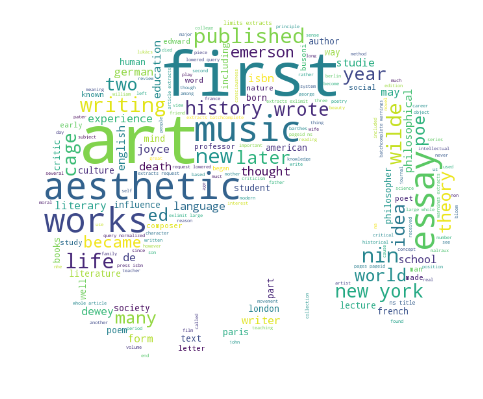

In [153]:
wolf_mask = imread(path.join("","wolf.png"))
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      mask=wolf_mask,
                      width=1800,
                      height=1400
                     ).generate(aest_cloud)

plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure()
plt.savefig('./aest_wordcloud.png', dpi=500)
plt.show()

### Word-cloud for each branch of philosophy. 
*Feel free to make it as fancy or non-fancy as you like. Comment on the results.*

What I will try to do:
* Embed in picture frame (masked)
   * example mask: *alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))*
   * Remember to add *plt.imshow(alice_mask, cmap=plt.cm.gray)* in the show part
* Add fancy font

In [154]:
soc_cloud = ""
# join all to single string
soc_cloud = " ".join([word for word in soc_tokens if word not in removables])
#aest_cloud

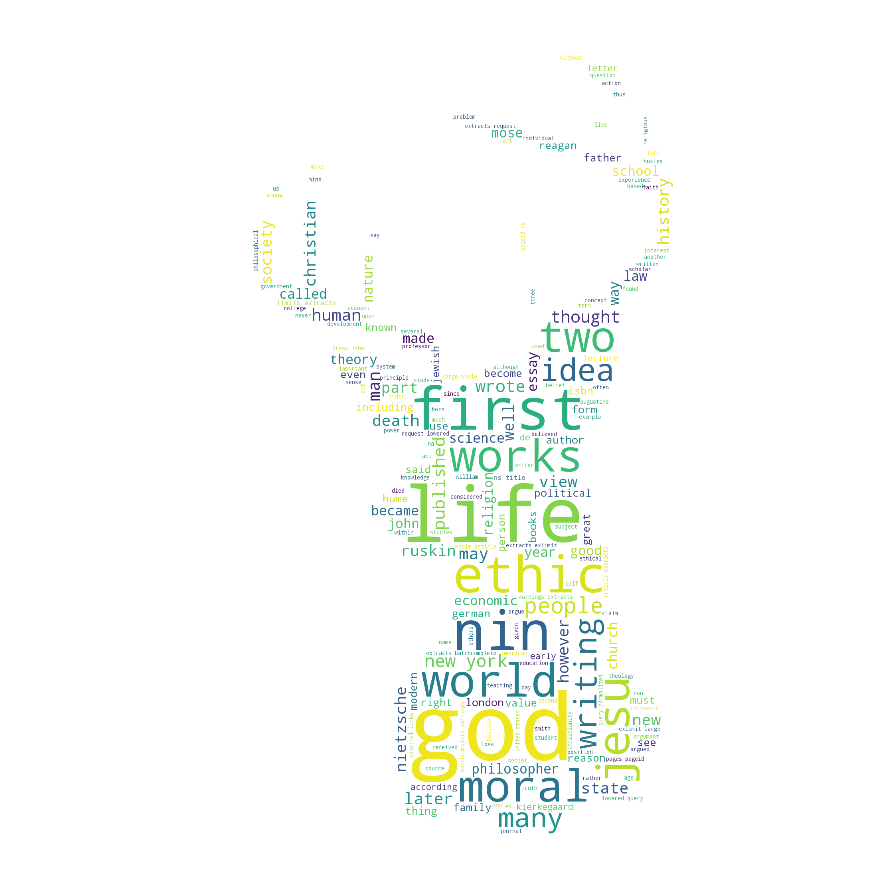

In [155]:
#d = path.dirname(__file__)
#cat_mask = np.array(Image.open(path.join("","cat-clipart.jpeg"))),
horse_mask = imread(path.join("","horse.png"))


wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      mask=horse_mask,
                      width=1800,
                      height=1400
                     ).generate(soc_cloud)

plt.figure(figsize=(15,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure()
#plt.imshow(horse_mask, cmap=plt.cm.gray)
plt.savefig('./soc_wordcloud.png', dpi=500)
#plt.axis('off')
plt.show()

In [164]:
eth_cloud = ""
# join all to single string
eth_cloud = " ".join([word for word in eth_tokens if word not in removables])

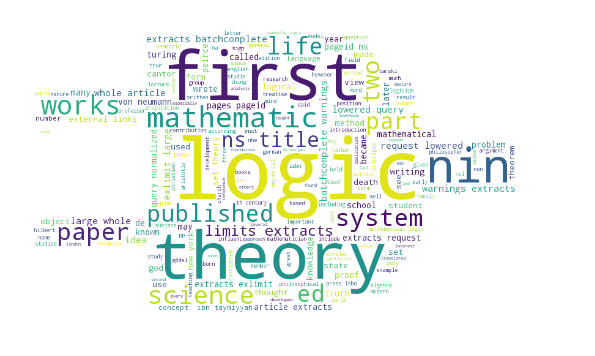

In [165]:
logic_mask = imread(path.join("","and.png"))

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      mask=logic_mask,
                      width=1800,
                      height=1400
                     ).generate(epi_cloud)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure()
plt.savefig('./eth_wordcloud.png', dpi=500)
plt.show()

In [166]:
epi_cloud = ""
# join all to single string
epi_cloud = " ".join([word for word in epi_tokens if word not in removables])

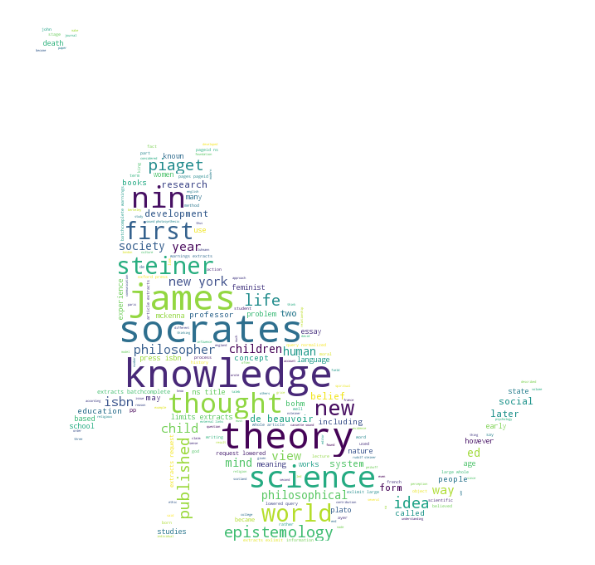

In [167]:
cat_mask = imread(path.join("","cat-clipart.jpeg"))

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      mask=cat_mask,
                      width=1800,
                      height=1400
                     ).generate(logic_cloud)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.figure()
plt.savefig('./epi_wordcloud.png', dpi=500)
plt.show()

In [168]:
meta_cloud = ""
# join all to single string
meta_cloud = " ".join([word for word in meta_tokens if word not in removables])

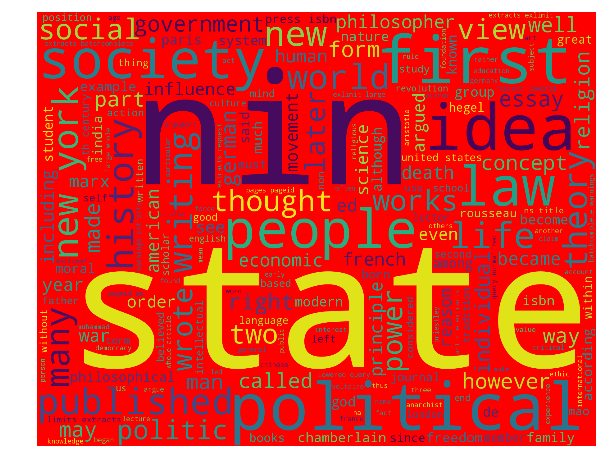

In [161]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='red',
                      width=1800,
                      height=1400
                     ).generate(meta_cloud)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./meta_wordcloud.png', dpi=500)
plt.show()

In [162]:
logic_cloud = ""
# join all to single string
logic_cloud = " ".join([word for word in logic_tokens if word not in removables])

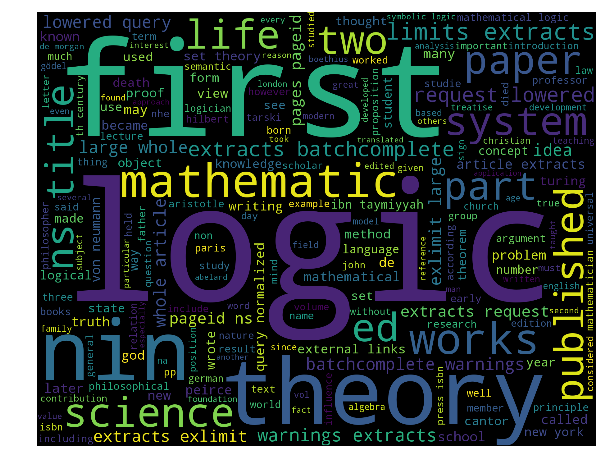

In [163]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(epi_cloud)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./logic_wordcloud.png', dpi=500)
plt.show()

Comments

## Sentiment Analysis

### Download the LabMT wordlist. 
It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter (Data Set S1)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752). Describe briefly how the list was generated.


Evaluation of happiness. Word value.

### Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc). The function should complain if there are no words with sentiment attached.


In [195]:
import pandas as pd
    
url = 'datasets01.csv'
labmt = pd.read_csv(url, skiprows=2, sep='\t', index_col=0)

# We subtracting the global average from the individual values to get a
average = labmt.happiness_average.mean()
happiness = (labmt.happiness_average - average).to_dict()

In [190]:
# We need some NLTK corpus data.

import nltk

nltk_packages = ['wordnet', 'gutenberg']

def verifyOrDownloadPackage(name):
    try:
        print "Verifying that %s is installed..." % name
        nltk.data.find("corpora/"+name)
        print "Found!"
    except LookupError:
        print "Could not find %s" %name
        print "Downloading now..."
        nltk.download(name)
        
for package in nltk_packages:
    verifyOrDownloadPackage(package)


In [191]:
from nltk.stem import WordNetLemmatizer

import re
import math

def sentiment(text, default = None):
    # First let's grab all the words.
    # The Regex below captures all words in our text.
    words = []
    if isinstance(text, basestring):
        words = re.findall(ur"[A-z]+", text)
    else:
        words = text
    
    # We set the default score to 0 for positive and negative words.
    P = 0.0
    N = 0.0
    
    wnl = WordNetLemmatizer()
    for word in words:
        # In case a word only exists in a shorter form, let's lemmatize/stem it. (dogs -> dog)
        lemmatized = wnl.lemmatize(word.lower())
        hp = happiness.get(word.lower())
        
        if hp is None:
            lemmatized_hp = happiness.get(lemmatized.lower())
            if lemmatized_hp is not None:
                hp = lemmatized_hp
            else:
                hp = 0
            
        if hp > 0:
            # If it's a positive value, we'll add it to the positives.
            P = P + hp
        elif hp < 0:
            # If it's negative, we'll take the absolute value, and add to the negatives.
            N = N + math.fabs(hp)
    
    # Our final calculation.
    sentiment = math.log(P + 0.5) - math.log(N + 0.5)
    if P == 0.0 and N == 0.0:
        # In case we didn't get any value.
        return default
    
    return sentiment

In [192]:
from nltk.book import *

In [193]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def analyseTextSentiment(text):
    slim = []
    
    wnl = WordNetLemmatizer()
    for word in text:
        found1 = (word.lower() in happiness)
        found2 = (wnl.lemmatize(word.lower()) in happiness)
        if found1:
            slim.append(word)
        elif found2:
            slim.append(word)
    moving_averages = {15:[],50:[],150:[],500:[]}
    
    for avg in moving_averages.keys():
        for idx in enumerate(text):
            i = idx[0]
            moving_averages[avg].append(sentiment(text[i-avg:i],default=0))
            
    mean = numpy.mean(moving_averages[15])
    
    # Let's plot this
    matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)
    
    plt.title('Sentiment Analysis')
    plt.plot(moving_averages[15],linewidth=0.5,color='#a1dab4',label='15',zorder=1)
    plt.plot(moving_averages[50],linewidth=0.5,color='#41b6c4',label='50',zorder=2)
    plt.plot(moving_averages[150],linewidth=1.0,color='#2c7fb8',label='150',zorder=3)
    plt.plot(moving_averages[500],linewidth=2.0,color='#253494',label='500',zorder=4)
    plt.axhline(0, color='black',zorder=10)
    plt.axhline(mean, color='m',zorder=10,label='mean')
    plt.legend()
    axes = plt.gca()
    axes.set_xlim([0,len(moving_averages[15])])
    plt.show()

In [196]:
with open('thetaleofthethreebrothers.txt', 'r') as myfile:
    data=myfile.read()
    analyseTextSentiment(data)

UnicodeDecodeError: 'utf8' codec can't decode byte 0x97 in position 0: invalid start byte

### Calculate a sentiment profile for the novels in NLPP1e chapter 1. The sentiment profile has sentiment on the y-axis and position in the text on the x-axis. Use a moving average to show how the sentiment changes. Create profiles for sliding windows of length 15 words, 50 words, 100 words, 500 words.

### Comment on the sentiment profiles. Do they show a similar pattern? What is the effect of changing the size of the sliding window?